In [ ]:

import numpy as np


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
import pandas as pd

In [3]:
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [4]:
train_path= './train'
test_path= './test'

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   zoom_range= 0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2)

test_datagen = ImageDataGenerator(rescale=1.0/255)

#Read our images to the data augmentations
#Generates batches of augmented data
train = train_datagen.flow_from_directory(train_path,
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')



test = test_datagen.flow_from_directory(test_path,
                                        color_mode = 'grayscale',
                                        target_size = (48, 48),
                                        batch_size = 64,
                                        shuffle=True,
                                        class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', 
                                                  classes=np.unique(train.classes), 
                                                  y=train.classes)
class_weights = dict(zip(np.unique(train.classes),class_weights))

filepath = '/my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5' #saves our best model to this location with custom name
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_delta=0.0001, verbose=1),
             tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss',verbose=1, save_best_only=True, mode='min'),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1,restore_best_weights=True)]


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
print(class_weights)
class_weights[2] = 1.4
class_weights[5] = 1.2
print(class_weights)

{0: 1.0266046844269623, 1: 9.406618610747051, 2: 1.0010460615781582, 3: 0.5684387684387684, 4: 0.8260394187886635, 5: 0.8491274770777877, 6: 1.293372978330405}
{0: 1.0266046844269623, 1: 9.406618610747051, 2: 1.4, 3: 0.5684387684387684, 4: 0.8260394187886635, 5: 1.2, 6: 1.293372978330405}


In [11]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),strides=(1,1),padding="valid",activation="relu",input_shape=(48,48,1)))
model.add(layers.MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(layers.Conv2D(256,(3,3),activation="relu"))
model.add(layers.MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(layers.Dense(7,activation="softmax"))

#loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]
#model.compile(optimizer = optim, loss=loss,metrics=metrics)
batch_size = 64
epochs = 50

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 23, 23, 32)        128       
_________________________________________________________________
dropout_10 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 10, 10, 64)       

In [14]:
model.fit(train,epochs=100,validation_data=test,verbose=1,class_weight=class_weights)


2022-03-02 18:00:31.235470: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 338 of 449
2022-03-02 18:00:34.498999: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 449 steps, validate for 113 steps
Epoch 1/100


2022-03-02 18:00:46.025320: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 353 of 449
2022-03-02 18:00:48.854107: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 215s 479ms/step - loss: 2.2160 - accuracy: 0.2013 - val_loss: 1.9265 - val_accuracy: 0.2419
Epoch 2/100


2022-03-02 18:04:19.676685: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 351 of 449
2022-03-02 18:04:22.451759: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 217s 484ms/step - loss: 1.9757 - accuracy: 0.2465 - val_loss: 1.7519 - val_accuracy: 0.3231
Epoch 3/100


2022-03-02 18:07:57.114752: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 354 of 449
2022-03-02 18:07:59.835203: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 221s 493ms/step - loss: 1.8683 - accuracy: 0.2917 - val_loss: 1.6529 - val_accuracy: 0.3749
Epoch 4/100


2022-03-02 18:11:38.593345: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 338 of 449
2022-03-02 18:11:41.784751: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 1.7871 - accuracy: 0.3252 - val_loss: 1.6266 - val_accuracy: 0.3784
Epoch 5/100


2022-03-02 18:15:22.247896: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 350 of 449
2022-03-02 18:15:25.067909: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 497ms/step - loss: 1.7146 - accuracy: 0.3526 - val_loss: 1.5595 - val_accuracy: 0.4037
Epoch 6/100


2022-03-02 18:19:05.286475: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 352 of 449
2022-03-02 18:19:08.054018: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 502ms/step - loss: 1.6613 - accuracy: 0.3729 - val_loss: 1.4834 - val_accuracy: 0.4347
Epoch 7/100


2022-03-02 18:22:50.586007: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 354 of 449
2022-03-02 18:22:53.266967: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 1.6077 - accuracy: 0.3883 - val_loss: 1.4774 - val_accuracy: 0.4429
Epoch 8/100


2022-03-02 18:26:35.343057: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 350 of 449
2022-03-02 18:26:38.185744: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 241s 537ms/step - loss: 1.5747 - accuracy: 0.3994 - val_loss: 1.4505 - val_accuracy: 0.4549
Epoch 9/100


2022-03-02 18:30:36.531425: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 337 of 449
2022-03-02 18:30:39.832449: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 234s 520ms/step - loss: 1.5459 - accuracy: 0.4121 - val_loss: 1.3846 - val_accuracy: 0.4696
Epoch 10/100


2022-03-02 18:34:30.117327: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 338 of 449
2022-03-02 18:34:33.261441: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 511ms/step - loss: 1.5097 - accuracy: 0.4240 - val_loss: 1.3802 - val_accuracy: 0.4826
Epoch 11/100


2022-03-02 18:38:19.428923: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 351 of 449
2022-03-02 18:38:22.227274: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 512ms/step - loss: 1.4774 - accuracy: 0.4331 - val_loss: 1.3291 - val_accuracy: 0.4987
Epoch 12/100


2022-03-02 18:42:09.184931: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-02 18:42:12.014842: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 513ms/step - loss: 1.4518 - accuracy: 0.4471 - val_loss: 1.3138 - val_accuracy: 0.4987
Epoch 13/100


2022-03-02 18:45:59.516270: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-02 18:46:02.443848: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 512ms/step - loss: 1.4297 - accuracy: 0.4546 - val_loss: 1.2900 - val_accuracy: 0.5107
Epoch 14/100


2022-03-02 18:49:49.205285: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-02 18:49:52.225099: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 231s 515ms/step - loss: 1.3988 - accuracy: 0.4687 - val_loss: 1.2670 - val_accuracy: 0.5194
Epoch 15/100


2022-03-02 18:53:40.496077: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-02 18:53:43.362231: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 237s 528ms/step - loss: 1.3828 - accuracy: 0.4727 - val_loss: 1.2519 - val_accuracy: 0.5240
Epoch 16/100


2022-03-02 18:57:37.348276: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-02 18:57:40.229730: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 239s 533ms/step - loss: 1.3636 - accuracy: 0.4824 - val_loss: 1.2783 - val_accuracy: 0.5128
Epoch 17/100


2022-03-02 19:01:36.649341: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 323 of 449
2022-03-02 19:01:40.302512: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 235s 524ms/step - loss: 1.3511 - accuracy: 0.4858 - val_loss: 1.2267 - val_accuracy: 0.5359
Epoch 18/100


2022-03-02 19:05:31.764254: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 351 of 449
2022-03-02 19:05:34.603707: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 512ms/step - loss: 1.3350 - accuracy: 0.4933 - val_loss: 1.2157 - val_accuracy: 0.5391
Epoch 19/100


2022-03-02 19:09:21.598764: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-02 19:09:24.552598: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 513ms/step - loss: 1.3251 - accuracy: 0.4963 - val_loss: 1.2193 - val_accuracy: 0.5396
Epoch 20/100


2022-03-02 19:13:11.728061: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-02 19:13:14.597736: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 512ms/step - loss: 1.3158 - accuracy: 0.4990 - val_loss: 1.1919 - val_accuracy: 0.5529
Epoch 21/100


2022-03-02 19:17:01.743533: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 352 of 449
2022-03-02 19:17:04.543777: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 232s 516ms/step - loss: 1.2987 - accuracy: 0.5067 - val_loss: 1.1867 - val_accuracy: 0.5479
Epoch 22/100


2022-03-02 19:20:53.331624: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-02 19:20:56.192939: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 513ms/step - loss: 1.2826 - accuracy: 0.5109 - val_loss: 1.1891 - val_accuracy: 0.5499
Epoch 23/100


2022-03-02 19:24:43.601419: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-02 19:24:46.494389: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 232s 516ms/step - loss: 1.2776 - accuracy: 0.5164 - val_loss: 1.1630 - val_accuracy: 0.5612
Epoch 24/100


2022-03-02 19:28:35.205611: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 351 of 449
2022-03-02 19:28:37.967369: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 1.2653 - accuracy: 0.5207 - val_loss: 1.1911 - val_accuracy: 0.5546
Epoch 25/100


2022-03-02 19:32:24.370492: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 337 of 449
2022-03-02 19:32:27.569696: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 513ms/step - loss: 1.2625 - accuracy: 0.5214 - val_loss: 1.1652 - val_accuracy: 0.5656
Epoch 26/100


2022-03-02 19:36:14.725358: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-02 19:36:17.663508: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 511ms/step - loss: 1.2510 - accuracy: 0.5251 - val_loss: 1.1512 - val_accuracy: 0.5670
Epoch 27/100


2022-03-02 19:40:04.358886: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-02 19:40:07.225698: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 232s 516ms/step - loss: 1.2441 - accuracy: 0.5274 - val_loss: 1.1485 - val_accuracy: 0.5663
Epoch 28/100


2022-03-02 19:43:56.216179: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 339 of 449
2022-03-02 19:43:59.379934: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 512ms/step - loss: 1.2310 - accuracy: 0.5344 - val_loss: 1.1413 - val_accuracy: 0.5708
Epoch 29/100


2022-03-02 19:47:46.228158: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-02 19:47:49.057747: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 231s 514ms/step - loss: 1.2231 - accuracy: 0.5367 - val_loss: 1.1349 - val_accuracy: 0.5736
Epoch 30/100


2022-03-02 19:51:36.997082: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-02 19:51:39.888189: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 232s 517ms/step - loss: 1.2202 - accuracy: 0.5365 - val_loss: 1.1229 - val_accuracy: 0.5756
Epoch 31/100


2022-03-02 19:55:29.064811: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 335 of 449
2022-03-02 19:55:32.315162: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 1.2070 - accuracy: 0.5451 - val_loss: 1.1127 - val_accuracy: 0.5819
Epoch 32/100


2022-03-02 19:59:17.986186: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 328 of 449
2022-03-02 19:59:21.513043: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 509ms/step - loss: 1.1995 - accuracy: 0.5462 - val_loss: 1.1183 - val_accuracy: 0.5779
Epoch 33/100


2022-03-02 20:03:06.724854: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 352 of 449
2022-03-02 20:03:09.477355: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 507ms/step - loss: 1.1956 - accuracy: 0.5468 - val_loss: 1.1116 - val_accuracy: 0.5784
Epoch 34/100


2022-03-02 20:06:54.256913: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 335 of 449
2022-03-02 20:06:57.723322: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 513ms/step - loss: 1.1912 - accuracy: 0.5483 - val_loss: 1.1050 - val_accuracy: 0.5843
Epoch 35/100


2022-03-02 20:10:44.546062: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-02 20:10:47.397894: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 511ms/step - loss: 1.1814 - accuracy: 0.5499 - val_loss: 1.1021 - val_accuracy: 0.5879
Epoch 36/100


2022-03-02 20:14:34.171288: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-02 20:14:37.035603: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 509ms/step - loss: 1.1747 - accuracy: 0.5539 - val_loss: 1.1051 - val_accuracy: 0.5872
Epoch 37/100


2022-03-02 20:18:22.824382: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-02 20:18:25.868371: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 512ms/step - loss: 1.1744 - accuracy: 0.5554 - val_loss: 1.0951 - val_accuracy: 0.5931
Epoch 38/100


2022-03-02 20:22:12.696139: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-02 20:22:15.647055: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 512ms/step - loss: 1.1642 - accuracy: 0.5602 - val_loss: 1.0908 - val_accuracy: 0.5922
Epoch 39/100


2022-03-02 20:26:02.466381: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-02 20:26:05.535011: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 231s 513ms/step - loss: 1.1572 - accuracy: 0.5631 - val_loss: 1.0949 - val_accuracy: 0.5918
Epoch 40/100


2022-03-02 20:29:53.001975: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 339 of 449
2022-03-02 20:29:56.124682: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 511ms/step - loss: 1.1555 - accuracy: 0.5627 - val_loss: 1.0975 - val_accuracy: 0.5904
Epoch 41/100


2022-03-02 20:33:42.263321: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-02 20:33:45.181748: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 507ms/step - loss: 1.1517 - accuracy: 0.5643 - val_loss: 1.0948 - val_accuracy: 0.5921
Epoch 42/100


2022-03-02 20:37:30.116860: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-02 20:37:33.089331: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 1.1463 - accuracy: 0.5664 - val_loss: 1.0864 - val_accuracy: 0.5922
Epoch 43/100


2022-03-02 20:41:18.295650: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-02 20:41:21.417404: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 512ms/step - loss: 1.1408 - accuracy: 0.5715 - val_loss: 1.0900 - val_accuracy: 0.5880
Epoch 44/100


2022-03-02 20:45:08.242511: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-02 20:45:11.117269: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 1.1353 - accuracy: 0.5707 - val_loss: 1.0800 - val_accuracy: 0.5970
Epoch 45/100


2022-03-02 20:48:56.543265: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-02 20:48:59.455831: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 507ms/step - loss: 1.1313 - accuracy: 0.5741 - val_loss: 1.0685 - val_accuracy: 0.6024
Epoch 46/100


2022-03-02 20:52:44.280862: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-02 20:52:47.338344: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 513ms/step - loss: 1.1246 - accuracy: 0.5785 - val_loss: 1.0943 - val_accuracy: 0.5933
Epoch 47/100


2022-03-02 20:56:34.664848: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-02 20:56:37.771640: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 509ms/step - loss: 1.1202 - accuracy: 0.5776 - val_loss: 1.0770 - val_accuracy: 0.6006
Epoch 48/100


2022-03-02 21:00:23.109637: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-02 21:00:26.074348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 1.1210 - accuracy: 0.5760 - val_loss: 1.0653 - val_accuracy: 0.6046
Epoch 49/100


2022-03-02 21:04:12.192109: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-02 21:04:15.309414: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 509ms/step - loss: 1.1185 - accuracy: 0.5775 - val_loss: 1.0645 - val_accuracy: 0.6045
Epoch 50/100


2022-03-02 21:08:00.835423: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-02 21:08:03.785384: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 503ms/step - loss: 1.1100 - accuracy: 0.5803 - val_loss: 1.0598 - val_accuracy: 0.6021
Epoch 51/100


2022-03-02 21:11:46.792892: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-02 21:11:49.730525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 231s 514ms/step - loss: 1.1125 - accuracy: 0.5834 - val_loss: 1.0551 - val_accuracy: 0.6038
Epoch 52/100


2022-03-02 21:15:37.474239: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 337 of 449
2022-03-02 21:15:40.669133: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 1225s 3s/step - loss: 1.1042 - accuracy: 0.5846 - val_loss: 1.0568 - val_accuracy: 0.6014
Epoch 53/100


2022-03-02 21:36:02.678423: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 335 of 449
2022-03-02 21:36:06.001716: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 593s 1s/step - loss: 1.1015 - accuracy: 0.5787 - val_loss: 1.0623 - val_accuracy: 0.6038
Epoch 54/100


2022-03-02 21:45:55.234257: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-02 21:45:58.407412: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 3382s 8s/step - loss: 1.0993 - accuracy: 0.5844 - val_loss: 1.0583 - val_accuracy: 0.6112
Epoch 55/100


2022-03-02 22:42:17.530885: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-02 22:42:20.484604: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 1669s 4s/step - loss: 1.0985 - accuracy: 0.5849 - val_loss: 1.0518 - val_accuracy: 0.6082
Epoch 56/100


2022-03-02 23:10:06.570976: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 325 of 449
2022-03-02 23:10:10.109033: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 217s 484ms/step - loss: 1.0921 - accuracy: 0.5888 - val_loss: 1.0467 - val_accuracy: 0.6089
Epoch 57/100


2022-03-02 23:13:43.935335: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 338 of 449
2022-03-02 23:13:47.116187: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 220s 490ms/step - loss: 1.0892 - accuracy: 0.5894 - val_loss: 1.0510 - val_accuracy: 0.6078
Epoch 58/100


2022-03-02 23:17:24.095529: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-02 23:17:27.050580: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 220s 490ms/step - loss: 1.0886 - accuracy: 0.5895 - val_loss: 1.0561 - val_accuracy: 0.6043
Epoch 59/100


2022-03-02 23:21:04.060781: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 352 of 449
2022-03-02 23:21:06.829664: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 220s 491ms/step - loss: 1.0809 - accuracy: 0.5931 - val_loss: 1.0628 - val_accuracy: 0.6013
Epoch 60/100


2022-03-02 23:24:44.523294: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 350 of 449
2022-03-02 23:24:47.336131: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 222s 493ms/step - loss: 1.0722 - accuracy: 0.5961 - val_loss: 1.0497 - val_accuracy: 0.6094
Epoch 61/100


2022-03-02 23:28:26.098361: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-02 23:28:28.956273: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


298/449 [==================>...........] - ETA: 1:09 - loss: 1.0673 - accuracy: 0.5985

KeyboardInterrupt: 

In [15]:
model.fit(train,epochs=250,validation_data=test,verbose=1,class_weight=class_weights)

2022-03-02 23:47:48.494431: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 333 of 449
2022-03-02 23:47:51.824787: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 449 steps, validate for 113 steps
Epoch 1/250


2022-03-02 23:48:01.903681: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 350 of 449
2022-03-02 23:48:04.731033: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 216s 481ms/step - loss: 1.0741 - accuracy: 0.5941 - val_loss: 1.0584 - val_accuracy: 0.6050
Epoch 2/250


2022-03-02 23:51:37.854243: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-02 23:51:40.876467: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 216s 482ms/step - loss: 1.0726 - accuracy: 0.5924 - val_loss: 1.0545 - val_accuracy: 0.6088
Epoch 3/250


2022-03-02 23:55:14.186641: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-02 23:55:17.205717: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 220s 490ms/step - loss: 1.0668 - accuracy: 0.5937 - val_loss: 1.0439 - val_accuracy: 0.6127
Epoch 4/250


2022-03-02 23:58:54.048169: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-02 23:58:57.015781: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 671s 1s/step - loss: 1.0608 - accuracy: 0.5974 - val_loss: 1.0376 - val_accuracy: 0.6169
Epoch 5/250


2022-03-03 00:10:04.656754: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 339 of 449
2022-03-03 00:10:07.848900: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 217s 483ms/step - loss: 1.0620 - accuracy: 0.6018 - val_loss: 1.0409 - val_accuracy: 0.6121
Epoch 6/250


2022-03-03 00:13:41.509177: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 00:13:44.476895: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 221s 492ms/step - loss: 1.0562 - accuracy: 0.6007 - val_loss: 1.0382 - val_accuracy: 0.6166
Epoch 7/250


2022-03-03 00:17:22.498230: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-03 00:17:25.661495: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 496ms/step - loss: 1.0514 - accuracy: 0.6058 - val_loss: 1.0313 - val_accuracy: 0.6160
Epoch 8/250


2022-03-03 00:21:05.254746: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 00:21:08.157059: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 497ms/step - loss: 1.0514 - accuracy: 0.6022 - val_loss: 1.0341 - val_accuracy: 0.6137
Epoch 9/250


2022-03-03 00:24:48.191635: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-03 00:24:51.072849: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 1.0465 - accuracy: 0.6061 - val_loss: 1.0578 - val_accuracy: 0.6025
Epoch 10/250


2022-03-03 00:28:31.825609: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 00:28:34.871115: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 502ms/step - loss: 1.0442 - accuracy: 0.6043 - val_loss: 1.0241 - val_accuracy: 0.6193
Epoch 11/250


2022-03-03 00:32:17.320814: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 00:32:20.268461: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 502ms/step - loss: 1.0387 - accuracy: 0.6075 - val_loss: 1.0474 - val_accuracy: 0.6103
Epoch 12/250


2022-03-03 00:36:02.828185: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 329 of 449
2022-03-03 00:36:06.272782: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 507ms/step - loss: 1.0398 - accuracy: 0.6081 - val_loss: 1.0351 - val_accuracy: 0.6155
Epoch 13/250


2022-03-03 00:39:50.248639: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 00:39:53.257209: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 1.0341 - accuracy: 0.6077 - val_loss: 1.0225 - val_accuracy: 0.6205
Epoch 14/250


2022-03-03 00:43:38.477843: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 334 of 449
2022-03-03 00:43:41.784978: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 1.0367 - accuracy: 0.6085 - val_loss: 1.0224 - val_accuracy: 0.6212
Epoch 15/250


2022-03-03 00:47:27.282137: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 00:47:30.336652: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 507ms/step - loss: 1.0341 - accuracy: 0.6101 - val_loss: 1.0135 - val_accuracy: 0.6245
Epoch 16/250


2022-03-03 00:51:14.995068: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 341 of 449
2022-03-03 00:51:18.092274: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 506ms/step - loss: 1.0308 - accuracy: 0.6093 - val_loss: 1.0148 - val_accuracy: 0.6229
Epoch 17/250


2022-03-03 00:55:02.406414: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 325 of 449
2022-03-03 00:55:05.953642: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 509ms/step - loss: 1.0280 - accuracy: 0.6144 - val_loss: 1.0260 - val_accuracy: 0.6148
Epoch 18/250


2022-03-03 00:58:50.990109: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 331 of 449
2022-03-03 00:58:54.423977: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 507ms/step - loss: 1.0218 - accuracy: 0.6160 - val_loss: 1.0299 - val_accuracy: 0.6227
Epoch 19/250


2022-03-03 01:02:38.645093: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-03 01:02:41.785606: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 1.0182 - accuracy: 0.6154 - val_loss: 1.0318 - val_accuracy: 0.6158
Epoch 20/250


2022-03-03 01:06:26.914422: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 01:06:29.995725: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 509ms/step - loss: 1.0205 - accuracy: 0.6163 - val_loss: 1.0148 - val_accuracy: 0.6282
Epoch 21/250


2022-03-03 01:10:15.469551: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 335 of 449
2022-03-03 01:10:18.752507: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 506ms/step - loss: 1.0222 - accuracy: 0.6167 - val_loss: 1.0324 - val_accuracy: 0.6174
Epoch 22/250


2022-03-03 01:14:02.858422: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 01:14:05.946553: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 1.0180 - accuracy: 0.6177 - val_loss: 1.0157 - val_accuracy: 0.6225
Epoch 23/250


2022-03-03 01:17:50.985148: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 01:17:53.880267: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 509ms/step - loss: 1.0164 - accuracy: 0.6187 - val_loss: 1.0320 - val_accuracy: 0.6163
Epoch 24/250


2022-03-03 01:21:39.679325: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 338 of 449
2022-03-03 01:21:42.892643: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 511ms/step - loss: 1.0135 - accuracy: 0.6201 - val_loss: 1.0321 - val_accuracy: 0.6236
Epoch 25/250


2022-03-03 01:25:29.294991: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 01:25:32.366667: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 506ms/step - loss: 1.0088 - accuracy: 0.6171 - val_loss: 1.0815 - val_accuracy: 0.6049
Epoch 26/250


2022-03-03 01:29:16.622269: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 01:29:19.608374: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 1.0039 - accuracy: 0.6209 - val_loss: 1.0081 - val_accuracy: 0.6314
Epoch 27/250


2022-03-03 01:33:04.634824: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 01:33:07.705933: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 1.0017 - accuracy: 0.6219 - val_loss: 1.0097 - val_accuracy: 0.6276
Epoch 28/250


2022-03-03 01:36:53.495990: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 01:36:56.481937: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 0.9993 - accuracy: 0.6248 - val_loss: 1.0107 - val_accuracy: 0.6276
Epoch 29/250


2022-03-03 01:40:41.534333: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-03 01:40:44.686551: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 507ms/step - loss: 1.0043 - accuracy: 0.6265 - val_loss: 1.0093 - val_accuracy: 0.6314
Epoch 30/250


2022-03-03 01:44:29.142441: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-03 01:44:32.020250: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 509ms/step - loss: 1.0008 - accuracy: 0.6202 - val_loss: 1.0287 - val_accuracy: 0.6193
Epoch 31/250


2022-03-03 01:48:17.541263: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 01:48:20.577685: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 509ms/step - loss: 0.9974 - accuracy: 0.6250 - val_loss: 1.0099 - val_accuracy: 0.6275
Epoch 32/250


2022-03-03 01:52:05.917798: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-03 01:52:09.071898: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 0.9960 - accuracy: 0.6258 - val_loss: 1.0097 - val_accuracy: 0.6293
Epoch 33/250


2022-03-03 01:55:53.882980: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 01:55:56.825043: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 506ms/step - loss: 0.9967 - accuracy: 0.6258 - val_loss: 1.0206 - val_accuracy: 0.6232
Epoch 34/250


2022-03-03 01:59:41.043461: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 01:59:44.060260: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 512ms/step - loss: 0.9930 - accuracy: 0.6228 - val_loss: 1.0407 - val_accuracy: 0.6126
Epoch 35/250


2022-03-03 02:03:30.744567: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 02:03:33.789928: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 504ms/step - loss: 0.9883 - accuracy: 0.6277 - val_loss: 1.0066 - val_accuracy: 0.6290
Epoch 36/250


2022-03-03 02:07:17.042806: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 02:07:19.983908: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 348s 774ms/step - loss: 0.9870 - accuracy: 0.6301 - val_loss: 1.0020 - val_accuracy: 0.6314
Epoch 37/250


2022-03-03 02:13:04.688006: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 02:13:07.734739: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 220s 490ms/step - loss: 0.9878 - accuracy: 0.6299 - val_loss: 1.0038 - val_accuracy: 0.6308
Epoch 38/250


2022-03-03 02:16:44.637939: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 02:16:47.639968: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.9830 - accuracy: 0.6294 - val_loss: 1.0057 - val_accuracy: 0.6340
Epoch 39/250


2022-03-03 02:20:29.541385: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 02:20:32.499772: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 503ms/step - loss: 0.9842 - accuracy: 0.6321 - val_loss: 1.0077 - val_accuracy: 0.6303
Epoch 40/250


2022-03-03 02:24:15.450532: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 02:24:18.378083: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 504ms/step - loss: 0.9820 - accuracy: 0.6301 - val_loss: 1.0049 - val_accuracy: 0.6273
Epoch 41/250


2022-03-03 02:28:01.624903: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 02:28:04.695378: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 504ms/step - loss: 0.9702 - accuracy: 0.6345 - val_loss: 1.0207 - val_accuracy: 0.6247
Epoch 42/250


2022-03-03 02:31:48.110287: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 02:31:51.002975: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 504ms/step - loss: 0.9723 - accuracy: 0.6336 - val_loss: 1.0167 - val_accuracy: 0.6227
Epoch 43/250


2022-03-03 02:35:34.589944: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 02:35:37.558139: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 509s 1s/step - loss: 0.9653 - accuracy: 0.6375 - val_loss: 0.9981 - val_accuracy: 0.6297
Epoch 44/250


2022-03-03 02:44:03.643608: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 02:44:06.646196: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 219s 487ms/step - loss: 0.9680 - accuracy: 0.6375 - val_loss: 1.0143 - val_accuracy: 0.6257
Epoch 45/250


2022-03-03 02:47:42.240435: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 338 of 449
2022-03-03 02:47:45.492427: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 500ms/step - loss: 0.9705 - accuracy: 0.6347 - val_loss: 1.0088 - val_accuracy: 0.6294
Epoch 46/250


2022-03-03 02:51:26.546137: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 02:51:29.441542: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 502ms/step - loss: 0.9702 - accuracy: 0.6364 - val_loss: 0.9981 - val_accuracy: 0.6303
Epoch 47/250


2022-03-03 02:55:12.065383: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 02:55:14.998030: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 503ms/step - loss: 0.9673 - accuracy: 0.6363 - val_loss: 1.0199 - val_accuracy: 0.6226
Epoch 48/250


2022-03-03 02:58:58.105065: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 02:59:01.279436: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 503ms/step - loss: 0.9665 - accuracy: 0.6358 - val_loss: 1.0098 - val_accuracy: 0.6276
Epoch 49/250


2022-03-03 03:02:43.952789: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 03:02:47.049400: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.9637 - accuracy: 0.6356 - val_loss: 1.0069 - val_accuracy: 0.6322
Epoch 50/250


2022-03-03 03:06:28.844150: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 350 of 449
2022-03-03 03:06:31.659521: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.9613 - accuracy: 0.6388 - val_loss: 1.0226 - val_accuracy: 0.6194
Epoch 51/250


2022-03-03 03:10:12.876481: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 03:10:15.868585: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.9596 - accuracy: 0.6385 - val_loss: 1.0311 - val_accuracy: 0.6188
Epoch 52/250


2022-03-03 03:13:56.666650: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 332 of 449
2022-03-03 03:14:00.105392: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 502ms/step - loss: 0.9602 - accuracy: 0.6391 - val_loss: 1.0004 - val_accuracy: 0.6321
Epoch 53/250


2022-03-03 03:17:42.125838: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 341 of 449
2022-03-03 03:17:45.222660: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.9587 - accuracy: 0.6394 - val_loss: 0.9970 - val_accuracy: 0.6293
Epoch 54/250


2022-03-03 03:21:25.927283: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 03:21:28.817465: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 498ms/step - loss: 0.9539 - accuracy: 0.6417 - val_loss: 1.0098 - val_accuracy: 0.6241
Epoch 55/250


2022-03-03 03:25:09.400025: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 03:25:12.340499: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 500ms/step - loss: 0.9580 - accuracy: 0.6423 - val_loss: 1.0042 - val_accuracy: 0.6286
Epoch 56/250


2022-03-03 03:28:53.818516: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 03:28:56.695200: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 497ms/step - loss: 0.9526 - accuracy: 0.6432 - val_loss: 1.0020 - val_accuracy: 0.6293
Epoch 57/250


2022-03-03 03:32:37.089496: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 03:32:40.094088: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 496ms/step - loss: 0.9463 - accuracy: 0.6444 - val_loss: 1.0200 - val_accuracy: 0.6213
Epoch 58/250


2022-03-03 03:36:19.854072: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 03:36:22.755553: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.9531 - accuracy: 0.6421 - val_loss: 0.9937 - val_accuracy: 0.6340
Epoch 59/250


2022-03-03 03:40:04.096064: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 03:40:07.044456: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 500ms/step - loss: 0.9428 - accuracy: 0.6435 - val_loss: 1.0000 - val_accuracy: 0.6340
Epoch 60/250


2022-03-03 03:43:48.434980: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-03 03:43:51.240101: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 502ms/step - loss: 0.9418 - accuracy: 0.6484 - val_loss: 1.0112 - val_accuracy: 0.6230
Epoch 61/250


2022-03-03 03:47:33.682202: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 339 of 449
2022-03-03 03:47:36.834867: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 504ms/step - loss: 0.9467 - accuracy: 0.6462 - val_loss: 0.9944 - val_accuracy: 0.6395
Epoch 62/250


2022-03-03 03:51:20.058794: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-03 03:51:23.200784: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 507ms/step - loss: 0.9423 - accuracy: 0.6468 - val_loss: 0.9908 - val_accuracy: 0.6333
Epoch 63/250


2022-03-03 03:55:07.911162: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-03 03:55:10.786972: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 504ms/step - loss: 0.9449 - accuracy: 0.6413 - val_loss: 0.9942 - val_accuracy: 0.6358
Epoch 64/250


2022-03-03 03:58:54.063524: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 03:58:57.053646: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.9364 - accuracy: 0.6487 - val_loss: 1.0352 - val_accuracy: 0.6206
Epoch 65/250


2022-03-03 04:02:38.910461: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 04:02:42.030494: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.9389 - accuracy: 0.6494 - val_loss: 1.0337 - val_accuracy: 0.6261
Epoch 66/250


2022-03-03 04:06:24.084889: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 351 of 449
2022-03-03 04:06:26.872122: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 502ms/step - loss: 0.9378 - accuracy: 0.6452 - val_loss: 1.0028 - val_accuracy: 0.6287
Epoch 67/250


2022-03-03 04:10:09.499707: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 341 of 449
2022-03-03 04:10:12.581715: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.9340 - accuracy: 0.6463 - val_loss: 1.0133 - val_accuracy: 0.6264
Epoch 68/250


2022-03-03 04:13:53.701316: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 352 of 449
2022-03-03 04:13:56.443304: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.9367 - accuracy: 0.6482 - val_loss: 1.0138 - val_accuracy: 0.6261
Epoch 69/250


2022-03-03 04:17:38.516006: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 04:17:41.528083: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.9261 - accuracy: 0.6536 - val_loss: 1.0110 - val_accuracy: 0.6276
Epoch 70/250


2022-03-03 04:21:22.336123: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 04:21:25.234347: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.9352 - accuracy: 0.6510 - val_loss: 1.0073 - val_accuracy: 0.6312
Epoch 71/250


2022-03-03 04:25:06.151476: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 04:25:09.172652: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.9279 - accuracy: 0.6512 - val_loss: 1.0034 - val_accuracy: 0.6308
Epoch 72/250


2022-03-03 04:28:51.054885: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 04:28:53.935126: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 498ms/step - loss: 0.9302 - accuracy: 0.6510 - val_loss: 1.0244 - val_accuracy: 0.6233
Epoch 73/250


2022-03-03 04:32:34.454425: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 04:32:37.425749: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 498ms/step - loss: 0.9251 - accuracy: 0.6519 - val_loss: 0.9947 - val_accuracy: 0.6376
Epoch 74/250


2022-03-03 04:36:17.907561: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-03 04:36:20.726142: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.9341 - accuracy: 0.6482 - val_loss: 1.0032 - val_accuracy: 0.6310
Epoch 75/250


2022-03-03 04:40:01.994422: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 04:40:05.001226: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 498ms/step - loss: 0.9270 - accuracy: 0.6527 - val_loss: 1.0286 - val_accuracy: 0.6229
Epoch 76/250


2022-03-03 04:43:45.376517: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-03 04:43:48.208503: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 497ms/step - loss: 0.9224 - accuracy: 0.6557 - val_loss: 1.0056 - val_accuracy: 0.6346
Epoch 77/250


2022-03-03 04:47:28.361739: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 04:47:31.301466: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.9236 - accuracy: 0.6527 - val_loss: 0.9985 - val_accuracy: 0.6369
Epoch 78/250


2022-03-03 04:51:11.879398: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 341 of 449
2022-03-03 04:51:14.971897: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 500ms/step - loss: 0.9208 - accuracy: 0.6539 - val_loss: 0.9990 - val_accuracy: 0.6390
Epoch 79/250


2022-03-03 04:54:56.515804: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 04:54:59.482088: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.9164 - accuracy: 0.6569 - val_loss: 1.0528 - val_accuracy: 0.6070
Epoch 80/250


2022-03-03 04:58:40.434798: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 04:58:43.382702: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.9165 - accuracy: 0.6570 - val_loss: 0.9918 - val_accuracy: 0.6376
Epoch 81/250


2022-03-03 05:02:25.427494: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 05:02:28.435183: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.9160 - accuracy: 0.6534 - val_loss: 1.0107 - val_accuracy: 0.6325
Epoch 82/250


2022-03-03 05:06:10.175455: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 05:06:13.126802: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.9163 - accuracy: 0.6568 - val_loss: 0.9997 - val_accuracy: 0.6390
Epoch 83/250


2022-03-03 05:09:54.338382: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 05:09:57.297201: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.9163 - accuracy: 0.6570 - val_loss: 0.9942 - val_accuracy: 0.6415
Epoch 84/250


2022-03-03 05:13:37.948581: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 05:13:40.826713: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 502ms/step - loss: 0.9141 - accuracy: 0.6564 - val_loss: 1.0006 - val_accuracy: 0.6349
Epoch 85/250


2022-03-03 05:17:23.164169: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 05:17:26.122891: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 500ms/step - loss: 0.9163 - accuracy: 0.6542 - val_loss: 1.0162 - val_accuracy: 0.6337
Epoch 86/250


2022-03-03 05:21:07.748754: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 05:21:10.673232: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.9027 - accuracy: 0.6593 - val_loss: 0.9939 - val_accuracy: 0.6371
Epoch 87/250


2022-03-03 05:24:51.400133: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 05:24:54.336218: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.9119 - accuracy: 0.6548 - val_loss: 1.0081 - val_accuracy: 0.6310
Epoch 88/250


2022-03-03 05:28:36.357470: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 341 of 449
2022-03-03 05:28:39.475514: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.9089 - accuracy: 0.6577 - val_loss: 0.9975 - val_accuracy: 0.6389
Epoch 89/250


2022-03-03 05:32:20.326244: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 05:32:23.283684: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 498ms/step - loss: 0.9067 - accuracy: 0.6609 - val_loss: 1.0212 - val_accuracy: 0.6239
Epoch 90/250


2022-03-03 05:36:03.821227: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 05:36:06.789808: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 498ms/step - loss: 0.9075 - accuracy: 0.6583 - val_loss: 0.9921 - val_accuracy: 0.6374
Epoch 91/250


2022-03-03 05:39:47.237654: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 05:39:50.223193: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 500ms/step - loss: 0.9050 - accuracy: 0.6602 - val_loss: 1.0137 - val_accuracy: 0.6365
Epoch 92/250


2022-03-03 05:43:31.545450: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 05:43:34.393239: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 498ms/step - loss: 0.9056 - accuracy: 0.6592 - val_loss: 0.9967 - val_accuracy: 0.6376
Epoch 93/250


2022-03-03 05:47:14.957609: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 05:47:17.825982: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.9019 - accuracy: 0.6606 - val_loss: 1.0119 - val_accuracy: 0.6354
Epoch 94/250


2022-03-03 05:50:58.535971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 324 of 449
2022-03-03 05:51:02.136439: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 502ms/step - loss: 0.8985 - accuracy: 0.6618 - val_loss: 0.9995 - val_accuracy: 0.6379
Epoch 95/250


2022-03-03 05:54:43.873491: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 351 of 449
2022-03-03 05:54:46.673144: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.9029 - accuracy: 0.6633 - val_loss: 1.0214 - val_accuracy: 0.6243
Epoch 96/250


2022-03-03 05:58:27.802214: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 05:58:30.774611: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.9022 - accuracy: 0.6609 - val_loss: 0.9919 - val_accuracy: 0.6422
Epoch 97/250


2022-03-03 06:02:12.983364: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 06:02:15.995504: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8961 - accuracy: 0.6605 - val_loss: 1.0059 - val_accuracy: 0.6368
Epoch 98/250


2022-03-03 06:05:56.973231: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 06:05:59.895281: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8950 - accuracy: 0.6657 - val_loss: 0.9946 - val_accuracy: 0.6378
Epoch 99/250


2022-03-03 06:09:41.137529: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 06:09:44.146550: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.8948 - accuracy: 0.6666 - val_loss: 1.0159 - val_accuracy: 0.6336
Epoch 100/250


2022-03-03 06:13:25.912559: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 350 of 449
2022-03-03 06:13:28.707147: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.8956 - accuracy: 0.6645 - val_loss: 0.9891 - val_accuracy: 0.6441
Epoch 101/250


2022-03-03 06:17:09.663399: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 06:17:12.635906: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 500ms/step - loss: 0.8937 - accuracy: 0.6638 - val_loss: 1.0091 - val_accuracy: 0.6337
Epoch 102/250


2022-03-03 06:20:54.251159: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 319 of 449
2022-03-03 06:20:58.312736: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 504ms/step - loss: 0.8925 - accuracy: 0.6634 - val_loss: 1.0019 - val_accuracy: 0.6339
Epoch 103/250


2022-03-03 06:24:40.658086: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 06:24:43.716823: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8863 - accuracy: 0.6668 - val_loss: 0.9922 - val_accuracy: 0.6404
Epoch 104/250


2022-03-03 06:28:24.772404: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 351 of 449
2022-03-03 06:28:27.539868: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.8897 - accuracy: 0.6645 - val_loss: 1.0195 - val_accuracy: 0.6294
Epoch 105/250


2022-03-03 06:32:08.536158: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 06:32:11.605064: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.8924 - accuracy: 0.6669 - val_loss: 1.0050 - val_accuracy: 0.6374
Epoch 106/250


2022-03-03 06:35:53.422508: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 352 of 449
2022-03-03 06:35:56.184468: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 497ms/step - loss: 0.8857 - accuracy: 0.6677 - val_loss: 0.9989 - val_accuracy: 0.6374
Epoch 107/250


2022-03-03 06:39:36.408152: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 06:39:39.402286: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.8880 - accuracy: 0.6674 - val_loss: 1.0036 - val_accuracy: 0.6340
Epoch 108/250


2022-03-03 06:43:20.145418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 351 of 449
2022-03-03 06:43:22.905328: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 498ms/step - loss: 0.8828 - accuracy: 0.6708 - val_loss: 0.9928 - val_accuracy: 0.6390
Epoch 109/250


2022-03-03 06:47:03.541818: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 06:47:06.407678: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8815 - accuracy: 0.6684 - val_loss: 1.0012 - val_accuracy: 0.6337
Epoch 110/250


2022-03-03 06:50:47.780159: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 339 of 449
2022-03-03 06:50:50.887763: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 497ms/step - loss: 0.8815 - accuracy: 0.6698 - val_loss: 0.9900 - val_accuracy: 0.6381
Epoch 111/250


2022-03-03 06:54:31.136570: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 06:54:34.035099: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 497ms/step - loss: 0.8801 - accuracy: 0.6722 - val_loss: 0.9947 - val_accuracy: 0.6392
Epoch 112/250


2022-03-03 06:58:14.332230: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 06:58:17.249242: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 500ms/step - loss: 0.8862 - accuracy: 0.6705 - val_loss: 1.0031 - val_accuracy: 0.6335
Epoch 113/250


2022-03-03 07:01:58.783877: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 07:02:01.789723: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 506ms/step - loss: 0.8730 - accuracy: 0.6733 - val_loss: 0.9892 - val_accuracy: 0.6417
Epoch 114/250


2022-03-03 07:05:45.764692: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 341 of 449
2022-03-03 07:05:48.867994: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 506ms/step - loss: 0.8784 - accuracy: 0.6725 - val_loss: 0.9964 - val_accuracy: 0.6382
Epoch 115/250


2022-03-03 07:09:33.032813: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 341 of 449
2022-03-03 07:09:36.176910: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 0.8755 - accuracy: 0.6694 - val_loss: 1.0173 - val_accuracy: 0.6321
Epoch 116/250


2022-03-03 07:13:22.033846: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 07:13:25.001357: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 0.8782 - accuracy: 0.6697 - val_loss: 0.9972 - val_accuracy: 0.6399
Epoch 117/250


2022-03-03 07:17:10.146927: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 338 of 449
2022-03-03 07:17:13.323170: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 0.8719 - accuracy: 0.6730 - val_loss: 0.9919 - val_accuracy: 0.6413
Epoch 118/250


2022-03-03 07:20:58.985881: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 318 of 449
2022-03-03 07:21:02.897988: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 0.8646 - accuracy: 0.6772 - val_loss: 0.9991 - val_accuracy: 0.6383
Epoch 119/250


2022-03-03 07:24:48.044098: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 07:24:51.081228: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 506ms/step - loss: 0.8761 - accuracy: 0.6743 - val_loss: 1.0106 - val_accuracy: 0.6357
Epoch 120/250


2022-03-03 07:28:35.345261: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 07:28:38.301888: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 505ms/step - loss: 0.8748 - accuracy: 0.6708 - val_loss: 1.0123 - val_accuracy: 0.6376
Epoch 121/250


2022-03-03 07:32:22.152449: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 07:32:25.171896: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 504ms/step - loss: 0.8806 - accuracy: 0.6723 - val_loss: 1.0046 - val_accuracy: 0.6421
Epoch 122/250


2022-03-03 07:36:08.354620: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 07:36:11.283152: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 503ms/step - loss: 0.8677 - accuracy: 0.6727 - val_loss: 0.9936 - val_accuracy: 0.6413
Epoch 123/250


2022-03-03 07:39:54.231393: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 07:39:57.282945: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 511ms/step - loss: 0.8741 - accuracy: 0.6728 - val_loss: 1.0002 - val_accuracy: 0.6396
Epoch 124/250


2022-03-03 07:43:43.774936: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 07:43:46.913641: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 507ms/step - loss: 0.8718 - accuracy: 0.6716 - val_loss: 1.0191 - val_accuracy: 0.6329
Epoch 125/250


2022-03-03 07:47:31.387154: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 07:47:34.424921: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 0.8669 - accuracy: 0.6744 - val_loss: 0.9866 - val_accuracy: 0.6428
Epoch 126/250


2022-03-03 07:51:20.449790: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-03 07:51:23.548156: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 506ms/step - loss: 0.8721 - accuracy: 0.6696 - val_loss: 1.0029 - val_accuracy: 0.6381
Epoch 127/250


2022-03-03 07:55:07.717296: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 07:55:10.547527: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 503ms/step - loss: 0.8634 - accuracy: 0.6747 - val_loss: 0.9899 - val_accuracy: 0.6417
Epoch 128/250


2022-03-03 07:58:53.797992: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 07:58:56.860526: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 502ms/step - loss: 0.8680 - accuracy: 0.6712 - val_loss: 0.9897 - val_accuracy: 0.6452
Epoch 129/250


2022-03-03 08:02:39.133614: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 08:02:42.026801: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.8648 - accuracy: 0.6754 - val_loss: 0.9978 - val_accuracy: 0.6389
Epoch 130/250


2022-03-03 08:06:24.008520: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 08:06:26.949851: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.8627 - accuracy: 0.6755 - val_loss: 1.0006 - val_accuracy: 0.6385
Epoch 131/250


2022-03-03 08:10:08.794207: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 08:10:11.844810: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 503ms/step - loss: 0.8710 - accuracy: 0.6718 - val_loss: 0.9896 - val_accuracy: 0.6441
Epoch 132/250


2022-03-03 08:13:54.513391: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 350 of 449
2022-03-03 08:13:57.332703: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 500ms/step - loss: 0.8631 - accuracy: 0.6762 - val_loss: 0.9858 - val_accuracy: 0.6449
Epoch 133/250


2022-03-03 08:17:39.213674: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 08:17:42.137298: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 500ms/step - loss: 0.8570 - accuracy: 0.6771 - val_loss: 1.0263 - val_accuracy: 0.6360
Epoch 134/250


2022-03-03 08:21:23.766369: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 08:21:26.750575: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 505ms/step - loss: 0.8637 - accuracy: 0.6770 - val_loss: 0.9981 - val_accuracy: 0.6407
Epoch 135/250


2022-03-03 08:25:10.733167: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 08:25:13.974100: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 511ms/step - loss: 0.8618 - accuracy: 0.6780 - val_loss: 0.9933 - val_accuracy: 0.6439
Epoch 136/250


2022-03-03 08:28:59.966046: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-03 08:29:03.107549: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 509ms/step - loss: 0.8583 - accuracy: 0.6791 - val_loss: 0.9977 - val_accuracy: 0.6418
Epoch 137/250


2022-03-03 08:32:48.552813: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 08:32:51.493277: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 506ms/step - loss: 0.8585 - accuracy: 0.6790 - val_loss: 0.9968 - val_accuracy: 0.6431
Epoch 138/250


2022-03-03 08:36:35.762582: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 08:36:38.811882: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 0.8548 - accuracy: 0.6785 - val_loss: 0.9891 - val_accuracy: 0.6450
Epoch 139/250


2022-03-03 08:40:23.843566: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 08:40:26.839021: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 505ms/step - loss: 0.8561 - accuracy: 0.6796 - val_loss: 1.0093 - val_accuracy: 0.6390
Epoch 140/250


2022-03-03 08:44:10.568116: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 08:44:13.489573: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 500ms/step - loss: 0.8497 - accuracy: 0.6817 - val_loss: 0.9976 - val_accuracy: 0.6411
Epoch 141/250


2022-03-03 08:47:54.940768: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 08:47:57.891582: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 503ms/step - loss: 0.8528 - accuracy: 0.6791 - val_loss: 0.9923 - val_accuracy: 0.6422
Epoch 142/250


2022-03-03 08:51:40.618875: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 341 of 449
2022-03-03 08:51:43.694293: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 500ms/step - loss: 0.8539 - accuracy: 0.6792 - val_loss: 0.9971 - val_accuracy: 0.6421
Epoch 143/250


2022-03-03 08:55:24.997683: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 351 of 449
2022-03-03 08:55:27.763094: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8528 - accuracy: 0.6815 - val_loss: 1.0051 - val_accuracy: 0.6408
Epoch 144/250


2022-03-03 08:59:09.015656: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 341 of 449
2022-03-03 08:59:12.141028: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.8552 - accuracy: 0.6784 - val_loss: 1.0413 - val_accuracy: 0.6278
Epoch 145/250


2022-03-03 09:02:54.164226: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 09:02:57.084413: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8528 - accuracy: 0.6839 - val_loss: 0.9989 - val_accuracy: 0.6411
Epoch 146/250


2022-03-03 09:06:38.063563: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 09:06:41.008622: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8482 - accuracy: 0.6812 - val_loss: 0.9865 - val_accuracy: 0.6434
Epoch 147/250


2022-03-03 09:10:22.292126: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 09:10:25.218755: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8534 - accuracy: 0.6805 - val_loss: 1.0004 - val_accuracy: 0.6378
Epoch 148/250


2022-03-03 09:14:06.484075: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 319 of 449
2022-03-03 09:14:10.186052: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 500ms/step - loss: 0.8507 - accuracy: 0.6811 - val_loss: 1.0016 - val_accuracy: 0.6392
Epoch 149/250


2022-03-03 09:17:51.029049: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 09:17:53.939990: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.8522 - accuracy: 0.6823 - val_loss: 1.0119 - val_accuracy: 0.6375
Epoch 150/250


2022-03-03 09:21:34.835560: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 09:21:37.784669: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 500ms/step - loss: 0.8503 - accuracy: 0.6795 - val_loss: 0.9998 - val_accuracy: 0.6408
Epoch 151/250


2022-03-03 09:25:19.545742: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 09:25:22.488482: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 500ms/step - loss: 0.8475 - accuracy: 0.6825 - val_loss: 0.9859 - val_accuracy: 0.6463
Epoch 152/250


2022-03-03 09:29:03.825254: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 09:29:06.717434: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 497ms/step - loss: 0.8475 - accuracy: 0.6851 - val_loss: 0.9904 - val_accuracy: 0.6441
Epoch 153/250


2022-03-03 09:32:46.868304: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 09:32:49.874478: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 502ms/step - loss: 0.8438 - accuracy: 0.6822 - val_loss: 1.0001 - val_accuracy: 0.6439
Epoch 154/250


2022-03-03 09:36:32.169861: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 09:36:35.058866: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 497ms/step - loss: 0.8488 - accuracy: 0.6822 - val_loss: 0.9957 - val_accuracy: 0.6417
Epoch 155/250


2022-03-03 09:40:15.420803: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 09:40:18.386018: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 500ms/step - loss: 0.8474 - accuracy: 0.6792 - val_loss: 1.0062 - val_accuracy: 0.6421
Epoch 156/250


2022-03-03 09:43:59.793536: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 09:44:02.670752: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 498ms/step - loss: 0.8469 - accuracy: 0.6840 - val_loss: 1.0029 - val_accuracy: 0.6403
Epoch 157/250


2022-03-03 09:47:43.204770: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 09:47:46.100709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.8408 - accuracy: 0.6854 - val_loss: 0.9961 - val_accuracy: 0.6420
Epoch 158/250


2022-03-03 09:51:26.843096: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-03 09:51:29.977528: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 497ms/step - loss: 0.8497 - accuracy: 0.6839 - val_loss: 0.9995 - val_accuracy: 0.6407
Epoch 159/250


2022-03-03 09:55:10.181044: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 351 of 449
2022-03-03 09:55:12.975684: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8470 - accuracy: 0.6837 - val_loss: 0.9986 - val_accuracy: 0.6406
Epoch 160/250


2022-03-03 09:58:54.333247: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 09:58:57.310124: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 500ms/step - loss: 0.8371 - accuracy: 0.6858 - val_loss: 1.0023 - val_accuracy: 0.6435
Epoch 161/250


2022-03-03 10:02:39.048366: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 10:02:41.925697: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8310 - accuracy: 0.6910 - val_loss: 1.0137 - val_accuracy: 0.6378
Epoch 162/250


2022-03-03 10:06:23.153917: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 10:06:26.101820: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8438 - accuracy: 0.6833 - val_loss: 1.0090 - val_accuracy: 0.6402
Epoch 163/250


2022-03-03 10:10:07.087709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 10:10:10.267134: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.8396 - accuracy: 0.6866 - val_loss: 0.9989 - val_accuracy: 0.6408
Epoch 164/250


2022-03-03 10:13:52.076779: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 10:13:55.080304: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 502ms/step - loss: 0.8368 - accuracy: 0.6874 - val_loss: 1.0112 - val_accuracy: 0.6406
Epoch 165/250


2022-03-03 10:17:37.287610: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 10:17:40.150259: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8434 - accuracy: 0.6858 - val_loss: 1.0107 - val_accuracy: 0.6371
Epoch 166/250


2022-03-03 10:21:21.488764: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 10:21:24.499042: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 226s 502ms/step - loss: 0.8411 - accuracy: 0.6855 - val_loss: 1.0021 - val_accuracy: 0.6429
Epoch 167/250


2022-03-03 10:25:07.014704: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 10:25:09.926406: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 502ms/step - loss: 0.8414 - accuracy: 0.6861 - val_loss: 0.9999 - val_accuracy: 0.6414
Epoch 168/250


2022-03-03 10:28:52.317214: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 10:28:55.219087: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8337 - accuracy: 0.6850 - val_loss: 0.9966 - val_accuracy: 0.6439
Epoch 169/250


2022-03-03 10:32:36.536070: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 10:32:39.415385: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 500ms/step - loss: 0.8333 - accuracy: 0.6880 - val_loss: 1.0040 - val_accuracy: 0.6390
Epoch 170/250


2022-03-03 10:36:21.033179: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 10:36:23.944171: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8319 - accuracy: 0.6873 - val_loss: 1.0322 - val_accuracy: 0.6307
Epoch 171/250


2022-03-03 10:40:04.971795: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 335 of 449
2022-03-03 10:40:08.436462: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.8324 - accuracy: 0.6893 - val_loss: 1.0112 - val_accuracy: 0.6369
Epoch 172/250


2022-03-03 10:43:49.998129: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 10:43:52.979155: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8306 - accuracy: 0.6866 - val_loss: 1.0295 - val_accuracy: 0.6305
Epoch 173/250


2022-03-03 10:47:34.181169: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 10:47:37.068844: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8376 - accuracy: 0.6858 - val_loss: 1.0043 - val_accuracy: 0.6393
Epoch 174/250


2022-03-03 10:51:18.119542: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 10:51:21.195976: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 502ms/step - loss: 0.8332 - accuracy: 0.6847 - val_loss: 1.0170 - val_accuracy: 0.6349
Epoch 175/250


2022-03-03 10:55:03.334283: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-03 10:55:06.228580: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.8311 - accuracy: 0.6866 - val_loss: 1.0244 - val_accuracy: 0.6350
Epoch 176/250


2022-03-03 10:58:48.084306: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 10:58:51.073558: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 500ms/step - loss: 0.8285 - accuracy: 0.6916 - val_loss: 0.9963 - val_accuracy: 0.6402
Epoch 177/250


2022-03-03 11:02:32.393858: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 11:02:35.333003: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.8256 - accuracy: 0.6915 - val_loss: 0.9894 - val_accuracy: 0.6464
Epoch 178/250


2022-03-03 11:06:16.205406: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 346 of 449
2022-03-03 11:06:19.126982: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 500ms/step - loss: 0.8320 - accuracy: 0.6878 - val_loss: 1.0303 - val_accuracy: 0.6326
Epoch 179/250


2022-03-03 11:10:00.843327: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 11:10:03.884799: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 498ms/step - loss: 0.8276 - accuracy: 0.6886 - val_loss: 1.0040 - val_accuracy: 0.6390
Epoch 180/250


2022-03-03 11:13:44.481777: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 348 of 449
2022-03-03 11:13:47.354001: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.8296 - accuracy: 0.6877 - val_loss: 1.0113 - val_accuracy: 0.6371
Epoch 181/250


2022-03-03 11:17:29.339712: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 11:17:32.346061: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8314 - accuracy: 0.6890 - val_loss: 1.0263 - val_accuracy: 0.6321
Epoch 182/250


2022-03-03 11:21:13.425763: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 11:21:16.319603: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 223s 497ms/step - loss: 0.8260 - accuracy: 0.6940 - val_loss: 0.9986 - val_accuracy: 0.6414
Epoch 183/250


2022-03-03 11:24:56.698672: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 11:24:59.688224: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8242 - accuracy: 0.6891 - val_loss: 0.9939 - val_accuracy: 0.6397
Epoch 184/250


2022-03-03 11:28:40.655297: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 329 of 449
2022-03-03 11:28:44.061126: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 501ms/step - loss: 0.8287 - accuracy: 0.6915 - val_loss: 1.0130 - val_accuracy: 0.6358
Epoch 185/250


2022-03-03 11:32:25.444793: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 11:32:28.489900: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 224s 499ms/step - loss: 0.8256 - accuracy: 0.6902 - val_loss: 0.9963 - val_accuracy: 0.6429
Epoch 186/250


2022-03-03 11:36:09.522432: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 349 of 449
2022-03-03 11:36:12.366844: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 225s 502ms/step - loss: 0.8283 - accuracy: 0.6891 - val_loss: 0.9991 - val_accuracy: 0.6435
Epoch 187/250


2022-03-03 11:39:54.966462: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 334 of 449
2022-03-03 11:39:58.291803: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 511ms/step - loss: 0.8330 - accuracy: 0.6891 - val_loss: 0.9992 - val_accuracy: 0.6418
Epoch 188/250


2022-03-03 11:43:44.322515: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 11:43:47.462171: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 0.8286 - accuracy: 0.6891 - val_loss: 0.9927 - val_accuracy: 0.6474
Epoch 189/250


2022-03-03 11:47:33.473293: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 339 of 449
2022-03-03 11:47:36.639550: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 509ms/step - loss: 0.8338 - accuracy: 0.6905 - val_loss: 0.9940 - val_accuracy: 0.6471
Epoch 190/250


2022-03-03 11:51:22.203748: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 338 of 449
2022-03-03 11:51:25.438294: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 0.8248 - accuracy: 0.6909 - val_loss: 0.9979 - val_accuracy: 0.6427
Epoch 191/250


2022-03-03 11:55:11.146101: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 11:55:14.127145: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 512ms/step - loss: 0.8225 - accuracy: 0.6915 - val_loss: 1.0106 - val_accuracy: 0.6372
Epoch 192/250


2022-03-03 11:59:00.994913: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-03 11:59:04.095788: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 0.8162 - accuracy: 0.6959 - val_loss: 0.9982 - val_accuracy: 0.6407
Epoch 193/250


2022-03-03 12:02:49.158744: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 12:02:52.955995: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 507ms/step - loss: 0.8132 - accuracy: 0.6964 - val_loss: 1.0010 - val_accuracy: 0.6427
Epoch 194/250


2022-03-03 12:06:36.885669: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 12:06:39.870972: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 0.8220 - accuracy: 0.6950 - val_loss: 1.0052 - val_accuracy: 0.6420
Epoch 195/250


2022-03-03 12:10:25.785509: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 339 of 449
2022-03-03 12:10:28.974203: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 0.8178 - accuracy: 0.6947 - val_loss: 1.0029 - val_accuracy: 0.6449
Epoch 196/250


2022-03-03 12:14:13.884526: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 12:14:16.957922: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 512ms/step - loss: 0.8217 - accuracy: 0.6908 - val_loss: 1.0411 - val_accuracy: 0.6322
Epoch 197/250


2022-03-03 12:18:03.608230: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 341 of 449
2022-03-03 12:18:06.692595: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 0.8219 - accuracy: 0.6933 - val_loss: 1.0204 - val_accuracy: 0.6386
Epoch 198/250


2022-03-03 12:21:51.738953: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 341 of 449
2022-03-03 12:21:54.854890: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 0.8191 - accuracy: 0.6950 - val_loss: 1.0016 - val_accuracy: 0.6424
Epoch 199/250


2022-03-03 12:25:39.918551: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 12:25:42.878171: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 506ms/step - loss: 0.8167 - accuracy: 0.6949 - val_loss: 0.9993 - val_accuracy: 0.6407
Epoch 200/250


2022-03-03 12:29:27.056494: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 12:29:30.095182: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 505ms/step - loss: 0.8178 - accuracy: 0.6959 - val_loss: 1.0131 - val_accuracy: 0.6371
Epoch 201/250


2022-03-03 12:33:13.655053: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 12:33:16.626854: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 227s 507ms/step - loss: 0.8215 - accuracy: 0.6910 - val_loss: 0.9956 - val_accuracy: 0.6414
Epoch 202/250


2022-03-03 12:37:01.081849: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-03 12:37:04.359449: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 0.8189 - accuracy: 0.6900 - val_loss: 0.9927 - val_accuracy: 0.6466
Epoch 203/250


2022-03-03 12:40:48.951761: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-03 12:40:52.103927: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 0.8144 - accuracy: 0.6934 - val_loss: 1.0004 - val_accuracy: 0.6470
Epoch 204/250


2022-03-03 12:44:37.821321: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 341 of 449
2022-03-03 12:44:40.904626: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 507ms/step - loss: 0.8219 - accuracy: 0.6925 - val_loss: 1.0052 - val_accuracy: 0.6422
Epoch 205/250


2022-03-03 12:48:25.582796: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 12:48:28.599185: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 512ms/step - loss: 0.8252 - accuracy: 0.6921 - val_loss: 1.0432 - val_accuracy: 0.6335
Epoch 206/250


2022-03-03 12:52:15.684181: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 338 of 449
2022-03-03 12:52:18.887947: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 231s 516ms/step - loss: 0.8170 - accuracy: 0.6947 - val_loss: 0.9994 - val_accuracy: 0.6434
Epoch 207/250


2022-03-03 12:56:07.177510: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 12:56:10.182725: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 231s 515ms/step - loss: 0.8155 - accuracy: 0.6980 - val_loss: 1.0040 - val_accuracy: 0.6425
Epoch 208/250


2022-03-03 12:59:58.364904: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 342 of 449
2022-03-03 13:00:01.473120: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 509ms/step - loss: 0.8143 - accuracy: 0.6936 - val_loss: 1.0028 - val_accuracy: 0.6428
Epoch 209/250


2022-03-03 13:03:47.017911: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 449
2022-03-03 13:03:49.953690: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 0.8056 - accuracy: 0.6974 - val_loss: 1.0027 - val_accuracy: 0.6428
Epoch 210/250


2022-03-03 13:07:35.077647: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 340 of 449
2022-03-03 13:07:38.304483: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 510ms/step - loss: 0.8148 - accuracy: 0.6954 - val_loss: 0.9988 - val_accuracy: 0.6474
Epoch 211/250


2022-03-03 13:11:24.148190: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 343 of 449
2022-03-03 13:11:27.206207: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 229s 509ms/step - loss: 0.8127 - accuracy: 0.6971 - val_loss: 1.0054 - val_accuracy: 0.6424
Epoch 212/250


2022-03-03 13:15:12.667218: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 345 of 449
2022-03-03 13:15:15.642294: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 228s 508ms/step - loss: 0.8067 - accuracy: 0.6980 - val_loss: 1.0255 - val_accuracy: 0.6335
Epoch 213/250


2022-03-03 13:19:00.800268: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 344 of 449
2022-03-03 13:19:03.820047: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


449/449 [==============================] - 230s 512ms/step - loss: 0.8159 - accuracy: 0.6948 - val_loss: 1.0028 - val_accuracy: 0.6446
Epoch 214/250


2022-03-03 13:22:50.714283: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 331 of 449
2022-03-03 13:22:54.310103: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


  1/449 [..............................] - ETA: 1:44:44

KeyboardInterrupt: 

In [10]:
model.fit(train,epochs=50,validation_data=test,verbose=1,class_weight=class_weights)

Epoch 1/50
449/449 [==============================] - 30s 68ms/step - loss: 1.0376 - accuracy: 0.5715 - val_loss: 1.0742 - val_accuracy: 0.5946
Epoch 2/50
449/449 [==============================] - 30s 68ms/step - loss: 1.0296 - accuracy: 0.5780 - val_loss: 1.0755 - val_accuracy: 0.5936
Epoch 3/50
449/449 [==============================] - 30s 67ms/step - loss: 1.0160 - accuracy: 0.5796 - val_loss: 1.0773 - val_accuracy: 0.5982
Epoch 4/50
449/449 [==============================] - 30s 68ms/step - loss: 1.0238 - accuracy: 0.5783 - val_loss: 1.0858 - val_accuracy: 0.5924
Epoch 5/50
449/449 [==============================] - 30s 67ms/step - loss: 1.0288 - accuracy: 0.5765 - val_loss: 1.0864 - val_accuracy: 0.5918
Epoch 6/50
449/449 [==============================] - 31s 69ms/step - loss: 1.0296 - accuracy: 0.5766 - val_loss: 1.0837 - val_accuracy: 0.5978
Epoch 7/50
449/449 [==============================] - 30s 68ms/step - loss: 1.0158 - accuracy: 0.5779 - val_loss: 1.0893 - val_accuracy:

In [11]:
model.fit(train,epochs=50,validation_data=test,verbose=1,class_weight=class_weights)

Epoch 1/50
449/449 [==============================] - 40s 89ms/step - loss: 0.9619 - accuracy: 0.6017 - val_loss: 1.0459 - val_accuracy: 0.6055
Epoch 2/50
449/449 [==============================] - 31s 69ms/step - loss: 0.9526 - accuracy: 0.6019 - val_loss: 1.0316 - val_accuracy: 0.6106
Epoch 3/50
449/449 [==============================] - 30s 68ms/step - loss: 0.9518 - accuracy: 0.6022 - val_loss: 1.0758 - val_accuracy: 0.6006
Epoch 4/50
449/449 [==============================] - 30s 67ms/step - loss: 0.9521 - accuracy: 0.6031 - val_loss: 1.0620 - val_accuracy: 0.6006
Epoch 5/50
449/449 [==============================] - 31s 68ms/step - loss: 0.9462 - accuracy: 0.6061 - val_loss: 1.0401 - val_accuracy: 0.6103
Epoch 6/50
449/449 [==============================] - 31s 69ms/step - loss: 0.9469 - accuracy: 0.6059 - val_loss: 1.0418 - val_accuracy: 0.6076
Epoch 7/50
449/449 [==============================] - 30s 67ms/step - loss: 0.9452 - accuracy: 0.6041 - val_loss: 1.0821 - val_accuracy:

In [12]:
model.fit(train,epochs=250,validation_data=test,verbose=1,class_weight=class_weights)

Epoch 1/250
449/449 [==============================] - 54s 121ms/step - loss: 0.9092 - accuracy: 0.6217 - val_loss: 1.0333 - val_accuracy: 0.6145
Epoch 2/250
449/449 [==============================] - 56s 124ms/step - loss: 0.9089 - accuracy: 0.6231 - val_loss: 1.0141 - val_accuracy: 0.6177
Epoch 3/250
449/449 [==============================] - 56s 125ms/step - loss: 0.9067 - accuracy: 0.6235 - val_loss: 1.0571 - val_accuracy: 0.6031
Epoch 4/250
449/449 [==============================] - 57s 127ms/step - loss: 0.9037 - accuracy: 0.6242 - val_loss: 1.0263 - val_accuracy: 0.6160
Epoch 5/250
449/449 [==============================] - 55s 122ms/step - loss: 0.9038 - accuracy: 0.6228 - val_loss: 1.0737 - val_accuracy: 0.5949
Epoch 6/250
449/449 [==============================] - 55s 122ms/step - loss: 0.9150 - accuracy: 0.6168 - val_loss: 1.0263 - val_accuracy: 0.6165
Epoch 7/250
449/449 [==============================] - 55s 122ms/step - loss: 0.9027 - accuracy: 0.6223 - val_loss: 1.0386 -

In [13]:
model.fit(train,epochs=250,validation_data=test,verbose=1,class_weight=class_weights)

Epoch 1/250
449/449 [==============================] - 31s 69ms/step - loss: 0.7670 - accuracy: 0.6768 - val_loss: 1.0087 - val_accuracy: 0.6301
Epoch 2/250
449/449 [==============================] - 32s 70ms/step - loss: 0.7833 - accuracy: 0.6719 - val_loss: 1.0179 - val_accuracy: 0.6332
Epoch 3/250
449/449 [==============================] - 31s 69ms/step - loss: 0.7840 - accuracy: 0.6738 - val_loss: 1.0220 - val_accuracy: 0.6307
Epoch 4/250
449/449 [==============================] - 30s 68ms/step - loss: 0.7836 - accuracy: 0.6705 - val_loss: 1.0041 - val_accuracy: 0.6356
Epoch 5/250
449/449 [==============================] - 30s 67ms/step - loss: 0.7828 - accuracy: 0.6707 - val_loss: 1.0309 - val_accuracy: 0.6266
Epoch 6/250
449/449 [==============================] - 32s 70ms/step - loss: 0.7833 - accuracy: 0.6702 - val_loss: 1.0245 - val_accuracy: 0.6236
Epoch 7/250
449/449 [==============================] - 32s 71ms/step - loss: 0.7831 - accuracy: 0.6726 - val_loss: 0.9983 - val_ac

In [14]:
model.fit(train,epochs=1400,validation_data=test,verbose=1,class_weight=class_weights)

Epoch 1/1400
449/449 [==============================] - 31s 68ms/step - loss: 0.7348 - accuracy: 0.6919 - val_loss: 1.0200 - val_accuracy: 0.6415
Epoch 2/1400
449/449 [==============================] - 31s 68ms/step - loss: 0.7363 - accuracy: 0.6908 - val_loss: 1.0222 - val_accuracy: 0.6424
Epoch 3/1400
449/449 [==============================] - 30s 68ms/step - loss: 0.7239 - accuracy: 0.6946 - val_loss: 1.0231 - val_accuracy: 0.6415
Epoch 4/1400
449/449 [==============================] - 31s 68ms/step - loss: 0.7377 - accuracy: 0.6952 - val_loss: 1.0245 - val_accuracy: 0.6347
Epoch 5/1400
449/449 [==============================] - 30s 68ms/step - loss: 0.7277 - accuracy: 0.6969 - val_loss: 1.0110 - val_accuracy: 0.6429
Epoch 6/1400
449/449 [==============================] - 30s 68ms/step - loss: 0.7304 - accuracy: 0.6964 - val_loss: 1.0245 - val_accuracy: 0.6372
Epoch 7/1400
449/449 [==============================] - 30s 67ms/step - loss: 0.7301 - accuracy: 0.6952 - val_loss: 1.0320 -

KeyboardInterrupt: 

In [50]:
model.fit(train,epochs=1400,validation_data=test,verbose=1,class_weight=class_weights)

Epoch 1/1400
108/449 [======>.......................] - ETA: 22s - loss: 0.6905 - accuracy: 0.7063

KeyboardInterrupt: 

In [19]:
train_dir= './train'
validation_dir= './test'

In [20]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					width_shift_range=0.4,
					height_shift_range=0.4,
					horizontal_flip=True,
					fill_mode='nearest')
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=28709,
        color_mode = "grayscale",
        shuffle=True,
        class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(48, 48),
        batch_size=7178,
        color_mode = "grayscale",
        shuffle=True,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [21]:
train_images,train_labels = next(train_generator)
test_images,test_labels = next(validation_generator)


In [22]:
preds = model.predict(test_images)

In [23]:
test_labels_new = np.array([np.argmax(test_labels[i]) for i in range(7178)])
test_labels_new

array([5, 3, 5, ..., 6, 6, 3], dtype=int64)

In [24]:
preds_labels_new = np.array([np.argmax(preds[i]) for i in range(7178)])
preds_labels_new

array([5, 3, 5, ..., 6, 6, 3], dtype=int64)

In [25]:
np.sum(preds_labels_new[i]==test_labels_new[i] for i in range(7178))

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_13340/4044041814.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.sum(preds_labels_new[i]==test_labels_new[i] for i in range(7178))


4619

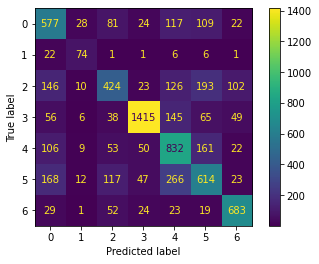

In [26]:
from sklearn.metrics import confusion_matrix , classification_report ,ConfusionMatrixDisplay
CLASS_LABELS  = [0,1,2,3,4,5,6]
cm_data = confusion_matrix(test_labels_new , preds_labels_new,labels=CLASS_LABELS)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_data,
                              display_labels=CLASS_LABELS)
disp.plot()
plt.show()

In [27]:
# accuracy of class 2: 41.4%
# accuracy of class 5: 49.2%
# if the accuracies of class2 and class5 improve to 60%, the whole accuracy will improve to 
# nearly 70%, if the accuracies of class2 and class5 improve to 72%
# is there a way to train another model which emphasizes the accuracy of class 2 and class 5
# for example, to largely increase the weight of class 2 and class 5
# put large penalty when class 2 and class 5 are misclassified and other classes are misclassified to be class 2 and class 5

4619/7178

0.643494009473391

In [34]:
train_path_2= './train_3'
test_path_2='./test_3'

In [35]:
train_datagen_2 = ImageDataGenerator(rescale=1.0/255,
                                   zoom_range= 0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2)

test_datagen_2 = ImageDataGenerator(rescale=1.0/255)

#Read our images to the data augmentations
#Generates batches of augmented data
train_2 = train_datagen_2.flow_from_directory(train_path_2,
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')



test_2 = test_datagen_2.flow_from_directory(test_path_2,
                                        color_mode = 'grayscale',
                                        target_size = (48, 48),
                                        batch_size = 64,
                                        shuffle=True,
                                        class_mode = 'categorical')

Found 17887 images belonging to 4 classes.
Found 4462 images belonging to 4 classes.


In [44]:
model2 = tf.keras.models.Sequential()
model2.add(layers.Conv2D(32,(3,3),strides=(1,1),padding="valid",activation="relu",input_shape=(48,48,1)))
model2.add(layers.MaxPool2D(2,2))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(layers.Conv2D(64,(3,3),activation="relu"))
model2.add(layers.MaxPool2D(2,2))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))


model2.add(layers.Conv2D(256,(3,3),activation="relu"))
model2.add(layers.MaxPool2D(2,2))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(layers.Flatten())
model2.add(layers.Dense(64,activation="relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))


model2.add(layers.Dense(4,activation="softmax"))

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]
model2.compile(optimizer = optim, loss=loss,metrics=metrics)
batch_size = 64
epochs = 50

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 23, 23, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 23, 23, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 64)      

In [47]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', 
                                                  classes=np.unique(train.classes), 
                                                  y=train.classes)
class_weights = dict(zip(np.unique(train.classes),class_weights))

filepath = '/my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5' #saves our best model to this location with custom name
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_delta=0.0001, verbose=1),
             tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss',verbose=1, save_best_only=True, mode='min'),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=1,restore_best_weights=True)]


model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model2.fit(train_2,epochs=50,validation_data=test_2,verbose=1,class_weight=class_weights)

Epoch 1/50
280/280 [==============================] - 23s 78ms/step - loss: 2.3015 - accuracy: 0.2502 - val_loss: 2.4967 - val_accuracy: 0.2324
Epoch 2/50
280/280 [==============================] - 22s 77ms/step - loss: 2.1340 - accuracy: 0.2597 - val_loss: 2.0704 - val_accuracy: 0.2512
Epoch 3/50
280/280 [==============================] - 22s 77ms/step - loss: 2.0600 - accuracy: 0.2675 - val_loss: 1.8679 - val_accuracy: 0.2766
Epoch 4/50
280/280 [==============================] - 22s 78ms/step - loss: 2.0095 - accuracy: 0.2770 - val_loss: 1.6108 - val_accuracy: 0.2958
Epoch 5/50
280/280 [==============================] - 22s 78ms/step - loss: 1.9772 - accuracy: 0.2795 - val_loss: 1.9351 - val_accuracy: 0.2689
Epoch 6/50
280/280 [==============================] - 22s 77ms/step - loss: 1.9335 - accuracy: 0.2853 - val_loss: 1.7849 - val_accuracy: 0.2678
Epoch 7/50
280/280 [==============================] - 22s 78ms/step - loss: 1.8929 - accuracy: 0.2919 - val_loss: 1.6351 - val_accuracy:

In [49]:
model2.fit(train_2,epochs=50,validation_data=test_2,verbose=1,class_weight=class_weights)

Epoch 1/50
280/280 [==============================] - 39s 139ms/step - loss: 1.2385 - accuracy: 0.5360 - val_loss: 1.3620 - val_accuracy: 0.4686
Epoch 2/50
280/280 [==============================] - 35s 126ms/step - loss: 1.2305 - accuracy: 0.5328 - val_loss: 1.4513 - val_accuracy: 0.4648
Epoch 3/50
280/280 [==============================] - 27s 97ms/step - loss: 1.2568 - accuracy: 0.5265 - val_loss: 1.5004 - val_accuracy: 0.4458
Epoch 4/50
280/280 [==============================] - 22s 80ms/step - loss: 1.2288 - accuracy: 0.5337 - val_loss: 1.4370 - val_accuracy: 0.4733
Epoch 5/50
280/280 [==============================] - 22s 79ms/step - loss: 1.2057 - accuracy: 0.5425 - val_loss: 1.4430 - val_accuracy: 0.4471
Epoch 6/50
280/280 [==============================] - 23s 80ms/step - loss: 1.2060 - accuracy: 0.5478 - val_loss: 1.3774 - val_accuracy: 0.4709
Epoch 7/50
280/280 [==============================] - 23s 81ms/step - loss: 1.1909 - accuracy: 0.5530 - val_loss: 1.6132 - val_accurac

KeyboardInterrupt: 

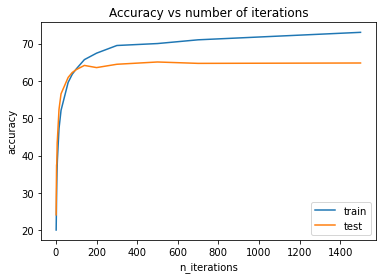

In [8]:
x = [1,2,3,4,5,6,7,15,25,60,80,100,140,200,300,500,700,1500]
train = [20.13,24.65,29.17,32.52,35.26,37.29,38.83,47.27,52.14,59.61,61.77,63.21,65.7,67.43,69.48,70,71,73]
test = [24.19,32.31,37.49,37.84,40.37,43.47,44.29,52.4,56.56,60.94,62.25,63.03,64.15,63.57,64.46,65.07,64.7,64.8]
fig, ax = plt.subplots()
ax.set_xlabel("n_iterations")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs number of iterations")
ax.plot(x, train,  label="train")
ax.plot(x, test,  label="test" )
ax.legend()
plt.show()

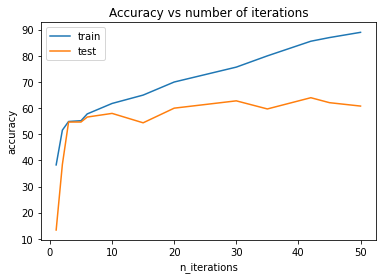

In [9]:
x = [1,2,3,5,6,10,15,20,30,35,42,45,50]
train = [38.3,51.6,54.9,55.2,57.8,61.8,65,70,75.7,80,85.6,87,89]
test = [13.4,38.5,54.7,54.7,56.6,58,54.4,60,62.8,59.7,64,62.1,60.8]
fig, ax = plt.subplots()
ax.set_xlabel("n_iterations")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs number of iterations")
ax.plot(x, train,  label="train")
ax.plot(x, test,  label="test" )
ax.legend()
plt.show()